In [2]:
#libraries

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures , StandardScaler
from sklearn.model_selection import learning_curve , train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import root_mean_squared_error 
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#quad dataset 

rng = np.random.default_rng(seed=42)
m = 200 #instances
x = 6 * rng.random((m,1)) - 3
y = 0.5 * x**2 + x + 2 + rng.standard_normal((m,1))

(np.float64(-3.0), np.float64(3.0), np.float64(0.0), np.float64(10.0))

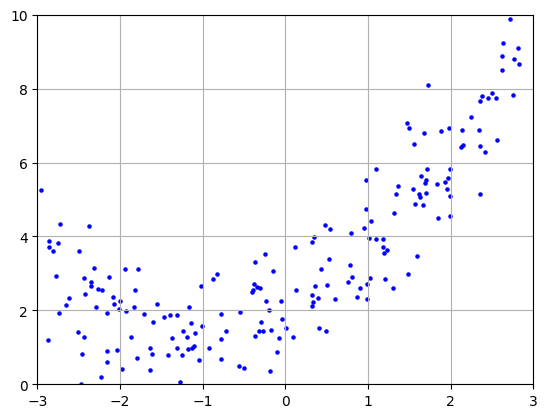

In [4]:
plt.scatter(x,y , c="b" , s=5)
plt.grid()
plt.axis([-3,3,0,10])

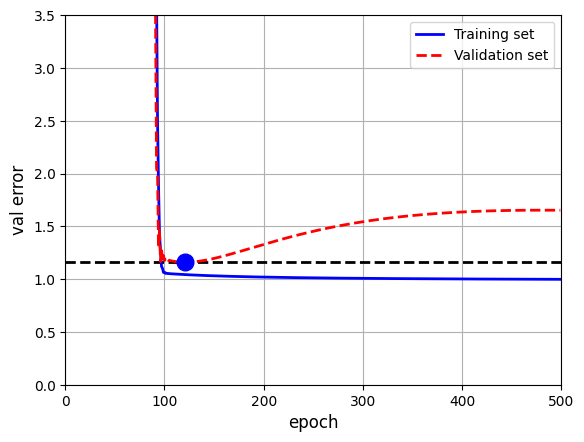

' \nmake a patience variable which denotes the number of epoch \nin which the val error isnt changed then \nincrement and compare at the last if else condition\n\n'

In [5]:
x_train , x_valid , y_train , y_valid = train_test_split(x , y , random_state=42)

preprocessing = make_pipeline(PolynomialFeatures(degree=90 , include_bias=False),
                              StandardScaler())

x_train_prep = preprocessing.fit_transform(x_train)
x_valid_prep = preprocessing.transform(x_valid)
sgd_reg =  SGDRegressor(penalty=None , eta0=0.002 , random_state=42 )
n_epochs = 500
best_valid_rmse = float('inf')
train_error_list , val_error_list = [] , []


for epoch in range(n_epochs):
    sgd_reg.partial_fit(x_train_prep , y_train.ravel())
    y_valid_predict = sgd_reg.predict(x_valid_prep)
    val_error = root_mean_squared_error(y_valid , y_valid_predict)
    val_error_list.append(val_error)
    
    y_train_predict = sgd_reg.predict(x_train_prep)
    train_error = root_mean_squared_error(y_train.ravel() , y_train_predict)
    train_error_list.append(train_error)
    
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)
        
best_epoch = np.argmin(val_error_list) #when val error is lest
plt.plot([0 , n_epochs] , [best_valid_rmse , best_valid_rmse] , "k--", linewidth = 2)
plt.plot(train_error_list , "b-" , linewidth=2 , label="Training set")
plt.plot(val_error_list , "r--" , linewidth=2 , label="Validation set")
plt.plot(best_epoch , best_valid_rmse , "bo" , markersize=12)
plt.legend(loc="upper right" , fontsize=10)

plt.grid()
plt.xlabel("epoch" , fontsize=12)
plt.ylabel("val error" , fontsize=12)
plt.axis([0 , n_epochs , 0.0 , 3.5])


plt.show()

#in order to stop :

''' 
make a patience variable which denotes the number of epoch 
in which the val error isnt changed then 
increment and compare at the last if else condition

'''


In [6]:
#LOGISTIC REGRESSION

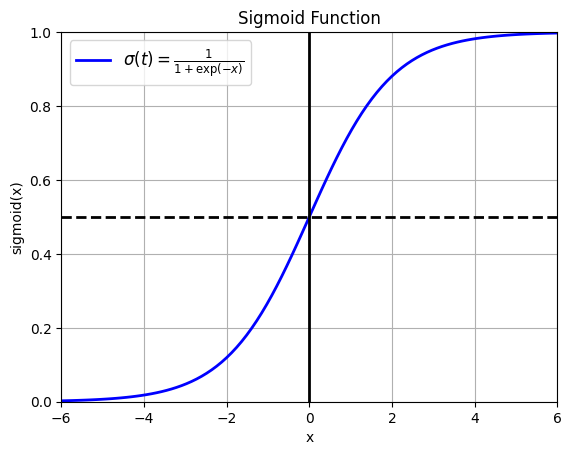

In [7]:
def sigmoid(x):
    return 1/ (1 + np.exp(-x))


def plot_sigmoid():
    x_new = np.linspace(-6 , 6 , 100)
    plt.plot(x_new , sigmoid(x_new) , "b" , linewidth=2 , label=r"$\sigma(t) = \frac{1}{1 + \exp(-x)}$")
    plt.grid()
    plt.xlabel("x")
    plt.ylabel("sigmoid(x)")
    plt.axis([-6 , 6 , 0 , 1])
    plt.legend(loc="upper left" , fontsize=12)
    plt.plot([-6 , 6] , [0.5 , 0.5] , "k--" , linewidth=2)
    plt.plot([0 , 0] , [0. , 1.] , "k-" , linewidth=2)
    plt.title("Sigmoid Function")


plot_sigmoid()    

/tmp/ipykernel_302260/2417904483.py:3: RuntimeWarning: invalid value encountered in log
  plt.plot(x_new , -np.log(x_new) , "b" , linewidth=2 , label=r"$-\log(x)$")


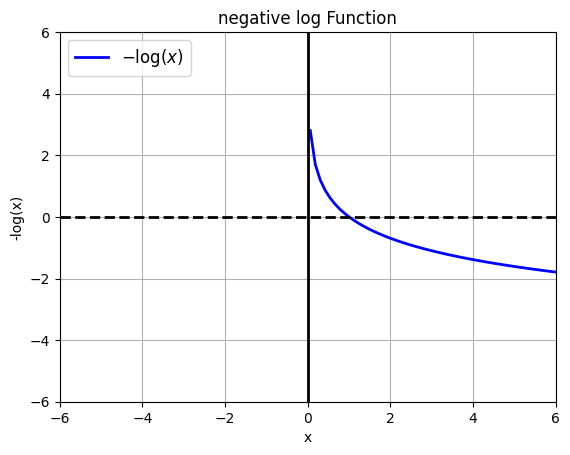

In [8]:
def plot_negative_log():
    x_new = np.linspace(-6 , 6 , 100)
    plt.plot(x_new , -np.log(x_new) , "b" , linewidth=2 , label=r"$-\log(x)$")
    plt.grid()
    plt.xlabel("x")
    plt.ylabel("-log(x)")
    plt.axis([-6 , 6 , -6 , 6])
    plt.legend(loc="upper left" , fontsize=12)
    plt.plot([-6 , 6] , [0 , 0] , "k--" , linewidth=2)
    plt.plot([0 , 0] , [-6 , 6] , "k-" , linewidth=2)
    plt.title("negative log Function")
    
    
plot_negative_log()

In [9]:
iris = load_iris(as_frame=True)
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [10]:
iris.target.head(3)

0    0
1    0
2    0
Name: target, dtype: int64

In [11]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
x = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] =='virginica'

In [13]:
x_train , x_test , y_train , y_test= train_test_split(x , y , random_state=42)

In [14]:
x_train.shape

(112, 1)

In [15]:
log_reg = LogisticRegression(random_state=  42)
log_reg.fit(x_train , y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multi

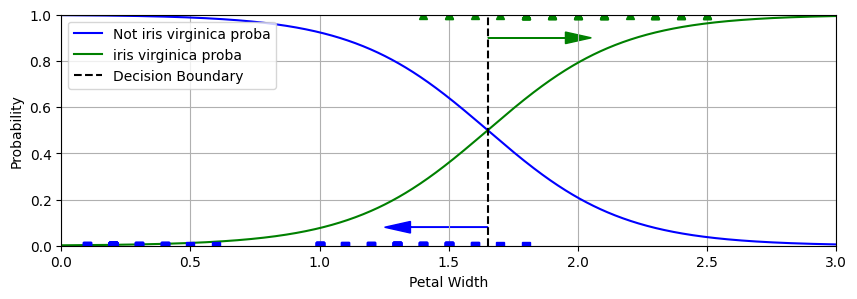

In [16]:
def plot_iris_logistic_reg(model ,x_train , y_train):
    petal_width_new = np.linspace(0 , 3 , 1000).reshape(-1 , 1)
    y_proba = model.predict_proba(petal_width_new)
    decision_boundary = petal_width_new[y_proba[: , 1] >= 0.5][0,0]
    
    plt.figure(figsize=(10 , 3))
    plt.plot(petal_width_new , y_proba[: , 0] , "b-" , label="Not iris virginica proba")
    plt.plot(petal_width_new , y_proba[: , 1] , "g-" , label="iris virginica proba")
    plt.plot([decision_boundary , decision_boundary] , [0. , 1.] , "k--" , label="Decision Boundary")
    plt.axis([0. , 3. , 0. , 1.])
    plt.grid()
    plt.xlabel("Petal Width")
    plt.ylabel("Probability")
    plt.legend(loc="upper left" , fontsize=10)
    plt.plot(x_train[y_train == 0] , y_train[y_train == 0] , "bs")
    plt.plot(x_train[y_train == 1] , y_train[y_train == 1] , "g^")
    plt.arrow(x=decision_boundary , y = 0.08 , dx=-0.3 , dy=0 , 
              head_width=0.05 , head_length=0.1 , fc="b" , ec="b" )
    plt.arrow(x=decision_boundary , y =0.90 , dx=0.3 , dy=0 , 
              head_width=0.05 , head_length=0.1 , fc="g" , ec="g")
    
    
plot_iris_logistic_reg(log_reg , x_train , y_train)

    
    

In [17]:
petal_width_new = np.linspace(0 , 3 , 10).reshape(-1 , 1)
y_proba = log_reg.predict_proba(petal_width_new)
decision_boundary = petal_width_new[y_proba[: , 1] >= 0.5][0 ,0]


y_proba[: , 0]

array([0.99820801, 0.99360486, 0.97744456, 0.92358825, 0.77123439,
       0.48461956, 0.20777713, 0.06816578, 0.01999554, 0.00565872])

In [18]:
y_proba[: , 1] # it means P(y==1 | x) 

array([0.00179199, 0.00639514, 0.02255544, 0.07641175, 0.22876561,
       0.51538044, 0.79222287, 0.93183422, 0.98000446, 0.99434128])

In [19]:
iris.data = np.array(iris.data)
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [20]:
x = iris.data[: , 2:]
y = iris.target_names[iris.target] == 'virginica'

In [21]:
x_train , x_test , y_train , y_test = train_test_split(x , y , random_state=42)


In [22]:
log_reg_ = LogisticRegression(random_state=42)
log_reg_.fit(x_train , y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multi